# Crop Recommendation

## Import required packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,accuracy_score

# Load the dataset

In [2]:
crop_df=pd.read_csv('C:Data/Crop_recommendation.csv')
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
crop_df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
crop_df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [6]:
crop_df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [7]:
crop_df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
crop_df.shape

(2200, 8)

<Axes: >

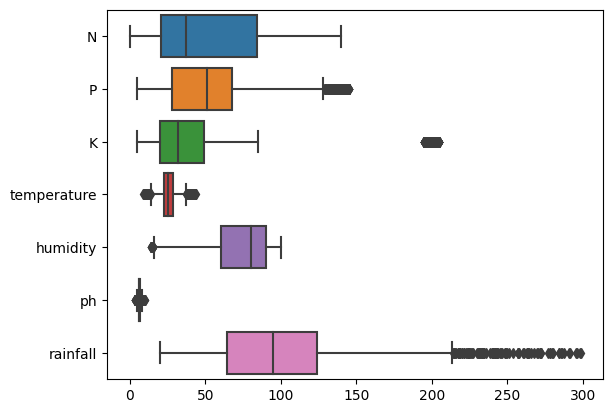

In [9]:
sns.boxplot(data=crop_df,orient='h')

In [10]:
'''Q3=np.percentile(crop_df['K'], 99,interpolation = 'midpoint')
crop_df=crop_df[crop_df['K']<=Q3]
print(Q3)
crop_df.shape'''

"Q3=np.percentile(crop_df['K'], 99,interpolation = 'midpoint')\ncrop_df=crop_df[crop_df['K']<=Q3]\nprint(Q3)\ncrop_df.shape"

In [11]:
crop_df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<Axes: >

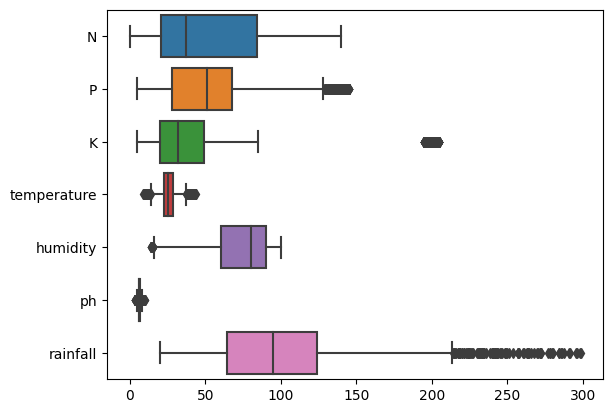

In [12]:
sns.boxplot(data=crop_df,orient='h')

In [13]:
crop_df.corr()

C:\Users\Windows PC\AppData\Local\Temp\ipykernel_16560\2531168637.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crop_df.corr()


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


C:\Users\Windows PC\AppData\Local\Temp\ipykernel_16560\385014631.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(crop_df.corr(),annot=True,square=True)


<Axes: >

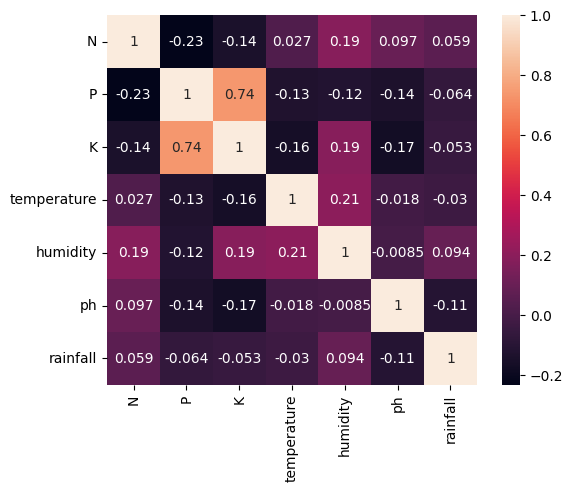

In [14]:
sns.heatmap(crop_df.corr(),annot=True,square=True)

In [15]:
#sns.pairplot(data=crop_df)

<Axes: xlabel='K', ylabel='label'>

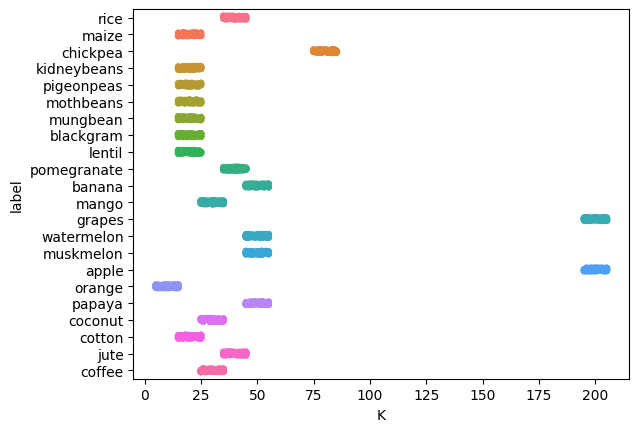

In [16]:
sns.stripplot(x='K',y='label',data=crop_df,hue='label',legend=False)

<Axes: xlabel='N', ylabel='label'>

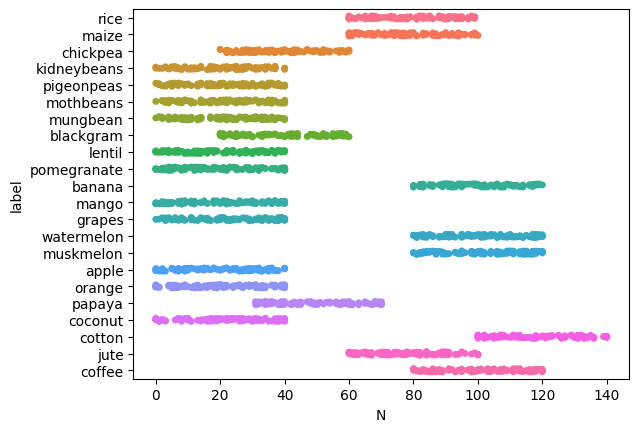

In [17]:
sns.stripplot(x='N',y='label',data=crop_df,hue='label',legend=False)

<Axes: xlabel='P', ylabel='label'>

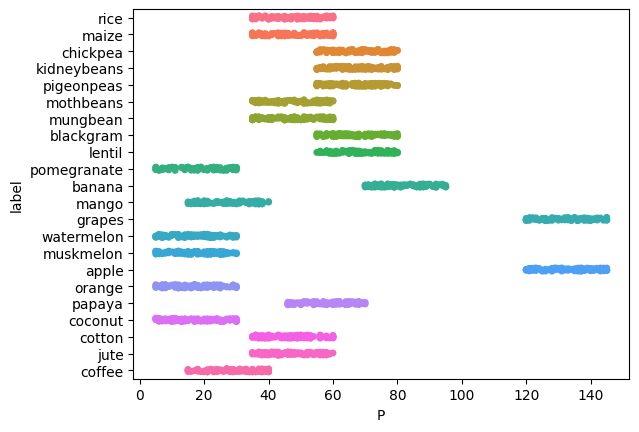

In [18]:
sns.stripplot(x='P',y='label',data=crop_df,hue='label',legend=False)

<Axes: xlabel='temperature', ylabel='label'>

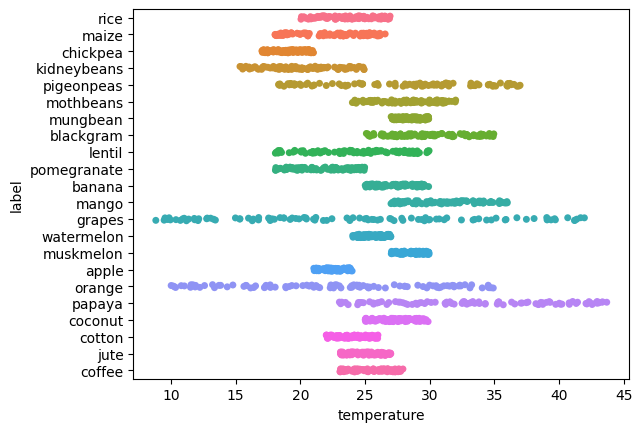

In [19]:
sns.stripplot(x='temperature',y='label',data=crop_df,hue='label',legend=False)

<Axes: xlabel='humidity', ylabel='label'>

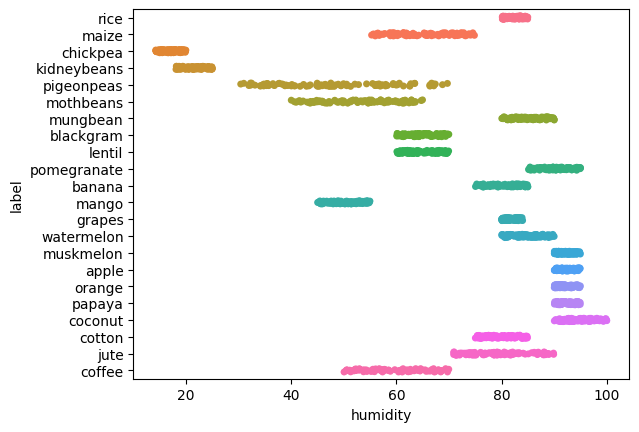

In [20]:
sns.stripplot(x='humidity',y='label',data=crop_df,hue='label',legend=False)

<Axes: xlabel='ph', ylabel='label'>

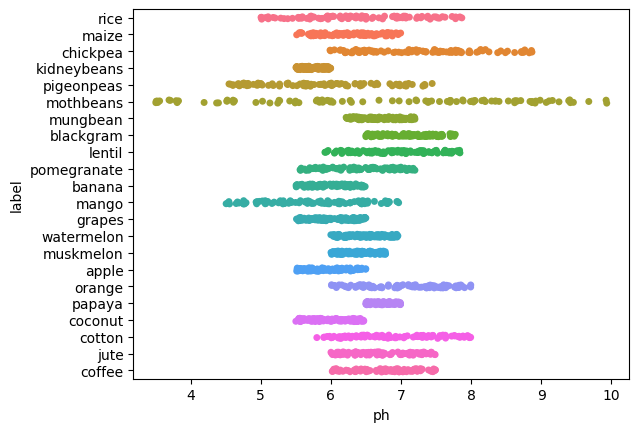

In [21]:
sns.stripplot(x='ph',y='label',data=crop_df,hue='label',legend=False)

<Axes: xlabel='rainfall', ylabel='label'>

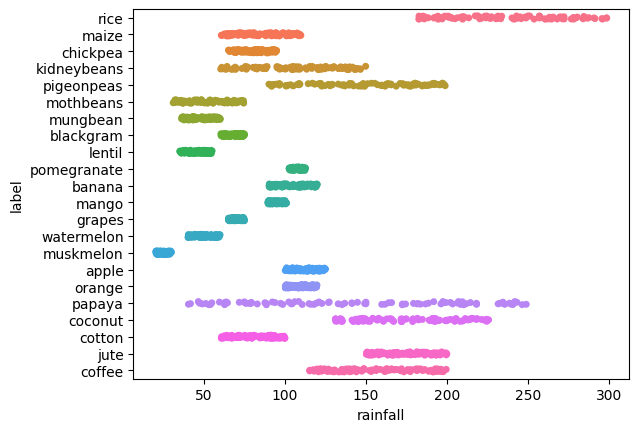

In [22]:
sns.stripplot(x='rainfall',y='label',data=crop_df,hue='label',legend=False)

# Independent and Dependent Variables

In [23]:
X=crop_df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
Y=crop_df['label']

In [24]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [25]:
Y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

# Normalization


In [26]:
scalar=StandardScaler()

In [27]:
X=scalar.fit_transform(X.values)

In [28]:
X

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

## Test and Train split dataset

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [30]:
X_train

array([[-0.82776195, -0.25358207, -0.61515194, ...,  0.54876457,
         0.38962283, -1.2051344 ],
       [ 1.39392186,  0.53481311, -0.00294434, ...,  0.35065569,
        -1.00058218, -0.01820478],
       [-0.5568249 , -0.76907123, -0.35841972, ..., -0.8665564 ,
        -1.81563215, -0.09092524],
       ...,
       [ 1.42101556, -1.13294593,  0.01680429, ...,  0.45640359,
         0.57671102, -0.94113546],
       [-0.71938713, -0.49616521, -0.53615741, ..., -0.59549214,
        -0.84168113, -0.74101288],
       [-0.34007526,  2.0206348 ,  2.93960185, ...,  0.51508972,
        -0.18837515, -0.54040465]])

In [31]:
Y_train

697       mungbean
1033        banana
1109         mango
1827       coconut
708      blackgram
           ...    
2009          jute
1180         mango
1344    watermelon
527      mothbeans
1289        grapes
Name: label, Length: 1540, dtype: object

In [32]:
X_test

array([[-0.0420445 ,  0.47416733,  0.66850915, ..., -2.52127101,
         1.02568841, -0.39450718],
       [-0.36716896, -1.31488328, -0.31892246, ...,  1.06392122,
        -0.39339655,  2.17194304],
       [ 1.93579596, -0.1626134 , -0.63490057, ...,  0.1865914 ,
        -0.20923005, -0.75772454],
       ...,
       [ 1.28554704, -0.31422786, -0.25967656, ...,  0.22277562,
         1.09913952,  1.55013627],
       [-0.34007526, -1.04197726, -0.33867109, ..., -1.00603739,
        -0.79399218, -0.23320092],
       [-0.31298155,  2.59676975,  3.01859638, ...,  0.42841823,
        -1.20127316, -0.63288978]])

In [33]:
Y_test

299     chickpea
1859     coconut
1939      cotton
2194      coffee
1861     coconut
          ...   
256     chickpea
112        maize
2062        jute
1126       mango
1247      grapes
Name: label, Length: 660, dtype: object

# Model Training

In [34]:
#varibles to store the models and respective accuricy
model_names=[]
models=[]
acc=[]

## Decision Tree

In [35]:
def decision():
    for i in range(1,20):
        DecisionTree=DecisionTreeClassifier(criterion='entropy',random_state=5,max_depth=i)
        DecisionTree.fit(X_train,Y_train)
        predicted_values = DecisionTree.predict(X_test)
        print(i,' -> ',accuracy_score(Y_test,predicted_values))

In [36]:
decision()

1  ->  0.06818181818181818
2  ->  0.14242424242424243
3  ->  0.32727272727272727
4  ->  0.6909090909090909
5  ->  0.8803030303030303
6  ->  0.9712121212121212
7  ->  0.9818181818181818
8  ->  0.9833333333333333
9  ->  0.9848484848484849
10  ->  0.9848484848484849
11  ->  0.9833333333333333
12  ->  0.9833333333333333
13  ->  0.9833333333333333
14  ->  0.9833333333333333
15  ->  0.9833333333333333
16  ->  0.9833333333333333
17  ->  0.9833333333333333
18  ->  0.9833333333333333
19  ->  0.9833333333333333


In [37]:
# We get maximum accuracy for max_depth = 9
DecisionTree=DecisionTreeClassifier(criterion='entropy',random_state=5,max_depth=9)
DecisionTree.fit(X_train,Y_train)
predicted_values = DecisionTree.predict(X_test)
print(accuracy_score(Y_test,predicted_values))

0.9848484848484849


In [38]:
print(classification_report(Y_test,predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       0.97      1.00      0.98        29
   blackgram       0.97      1.00      0.99        35
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        37
      cotton       1.00      0.97      0.99        36
      grapes       1.00      1.00      1.00        23
        jute       0.92      0.88      0.90        26
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      0.95      0.98        42
       maize       0.97      1.00      0.98        30
       mango       1.00      1.00      1.00        29
   mothbeans       0.93      0.97      0.95        29
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        33
      papaya       1.00    

In [39]:
#Cross valiate the model:Decision Tree
score=cross_val_score(DecisionTree,X,Y,cv=10)
score
ans=sum(score)/10
print(ans)

0.9854545454545454


In [40]:
model_names.append('Decision_Tree')
models.append(DecisionTree)
acc.append(ans)

## Guassian Naive Bayes

In [41]:
Gaussian=GaussianNB()
Gaussian.fit(X_train,Y_train)
predicted_values=Gaussian.predict(X_test)
print(accuracy_score(Y_test,predicted_values))

0.9954545454545455


In [42]:
print(classification_report(Y_test,predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        29
   blackgram       1.00      1.00      1.00        35
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        37
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        23
        jute       0.96      0.92      0.94        26
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      1.00      1.00        42
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        29
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        33
      papaya       1.00    

In [43]:
score=cross_val_score(Gaussian,X,Y,cv=10)
score
print(score)
ans=sum(score)/10
print(ans)

[1.         0.99545455 1.         0.99090909 0.99090909 1.
 0.99090909 1.         0.98636364 0.99545455]
0.9950000000000001


In [44]:
model_names.append('Gaussian_Naive_bayes')
models.append(Gaussian)
acc.append(ans)

In [45]:
print(model_names,acc,models)

['Decision_Tree', 'Gaussian_Naive_bayes'] [0.9854545454545454, 0.9950000000000001] [DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=5), GaussianNB()]


## SVM (Support Vector Machine)

In [46]:
kernal=['linear', 'poly', 'rbf', 'sigmoid']
for i in kernal:
    for j in range(2,7+1):
        svm=SVC(kernel=i,degree=j,C=1)
        svm.fit(X_train,Y_train)
        predicted_values=svm.predict(X_test)
        print(i,'->',j,'->',accuracy_score(Y_test,predicted_values))

linear -> 2 -> 0.9893939393939394
linear -> 3 -> 0.9893939393939394
linear -> 4 -> 0.9893939393939394
linear -> 5 -> 0.9893939393939394
linear -> 6 -> 0.9893939393939394
linear -> 7 -> 0.9893939393939394
poly -> 2 -> 0.9757575757575757
poly -> 3 -> 0.9409090909090909
poly -> 4 -> 0.843939393939394
poly -> 5 -> 0.7636363636363637
poly -> 6 -> 0.6742424242424242
poly -> 7 -> 0.6136363636363636
rbf -> 2 -> 0.9848484848484849
rbf -> 3 -> 0.9848484848484849
rbf -> 4 -> 0.9848484848484849
rbf -> 5 -> 0.9848484848484849
rbf -> 6 -> 0.9848484848484849
rbf -> 7 -> 0.9848484848484849
sigmoid -> 2 -> 0.7848484848484848
sigmoid -> 3 -> 0.7848484848484848
sigmoid -> 4 -> 0.7848484848484848
sigmoid -> 5 -> 0.7848484848484848
sigmoid -> 6 -> 0.7848484848484848
sigmoid -> 7 -> 0.7848484848484848


In [47]:
#we are getting highest accuracy for kernal=rbf and degree=3
svm=SVC(kernel='rbf',degree=3,C=1)
svm.fit(X_train,Y_train)
predicted_values=svm.predict(X_test)
print(accuracy_score(Y_test,predicted_values))

0.9848484848484849


In [48]:
print(classification_report(Y_test,predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        29
   blackgram       0.97      0.97      0.97        35
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        37
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        23
        jute       0.81      0.96      0.88        26
 kidneybeans       1.00      1.00      1.00        33
      lentil       0.98      0.98      0.98        42
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        29
   mothbeans       0.97      1.00      0.98        29
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        33
      papaya       1.00    

In [49]:
score=cross_val_score(svm,X,Y,cv=10)
print(score)
ans=sum(score)/10
print(ans)

[0.98181818 0.98636364 0.99090909 0.97727273 0.97272727 0.99090909
 0.99545455 0.97272727 0.97727273 0.99090909]
0.9836363636363636


In [50]:
model_names.append('SVM')
models.append(svm)
acc.append(ans)

In [51]:
print(model_names,acc,models)

['Decision_Tree', 'Gaussian_Naive_bayes', 'SVM'] [0.9854545454545454, 0.9950000000000001, 0.9836363636363636] [DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=5), GaussianNB(), SVC(C=1)]


## Random Forest Classifier

In [52]:
RF = RandomForestClassifier(n_estimators=20,criterion='entropy')
RF.fit(X_train,Y_train)
predicted_values=RF.predict(X_test)
print(accuracy_score(Y_test,predicted_values))

0.9954545454545455


In [53]:
print(classification_report(Y_test,predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        29
   blackgram       1.00      1.00      1.00        35
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        37
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        23
        jute       0.93      0.96      0.94        26
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      1.00      1.00        42
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        29
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        33
      papaya       1.00    

In [54]:
score=cross_val_score(RF,X,Y,cv=10)
print(score)
ans=sum(score)/10
print(ans)

[1.         0.99545455 1.         0.98181818 0.99545455 1.
 0.98636364 0.99545455 0.99090909 1.        ]
0.9945454545454545


In [55]:
model_names.append('Random_Forest')
models.append(RF)
acc.append(ans)

In [56]:
print(model_names,acc,models)

['Decision_Tree', 'Gaussian_Naive_bayes', 'SVM', 'Random_Forest'] [0.9854545454545454, 0.9950000000000001, 0.9836363636363636, 0.9945454545454545] [DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=5), GaussianNB(), SVC(C=1), RandomForestClassifier(criterion='entropy', n_estimators=20)]


## KNeighborsClassifier

In [57]:
for i in range(2,22):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,Y_train)
    predicted_values=KNN.predict(X_test)
    print(i,'->',accuracy_score(Y_test,predicted_values))

2 -> 0.9712121212121212
3 -> 0.9787878787878788
4 -> 0.9742424242424242
5 -> 0.9742424242424242
6 -> 0.9772727272727273
7 -> 0.9772727272727273
8 -> 0.9696969696969697
9 -> 0.9681818181818181
10 -> 0.9681818181818181
11 -> 0.9666666666666667
12 -> 0.9606060606060606
13 -> 0.9621212121212122
14 -> 0.9590909090909091
15 -> 0.956060606060606
16 -> 0.953030303030303
17 -> 0.946969696969697
18 -> 0.95
19 -> 0.9424242424242424
20 -> 0.946969696969697
21 -> 0.9454545454545454


In [58]:
#we got maximum for n_neighbors=3
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,Y_train)
predicted_values=KNN.predict(X_test)
print(accuracy_score(Y_test,predicted_values))

0.9787878787878788


In [59]:
score=cross_val_score(KNN,X,Y,cv=10)
print(score)
ans=sum(score)/10
print(ans)

[0.96363636 0.96818182 0.99090909 0.98181818 0.96363636 0.99090909
 0.98636364 0.96363636 0.97272727 0.98636364]
0.9768181818181819


In [60]:
model_names.append('KNN')
models.append(KNN)
acc.append(ans)

In [61]:
print(model_names,acc,models)

['Decision_Tree', 'Gaussian_Naive_bayes', 'SVM', 'Random_Forest', 'KNN'] [0.9854545454545454, 0.9950000000000001, 0.9836363636363636, 0.9945454545454545, 0.9768181818181819] [DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=5), GaussianNB(), SVC(C=1), RandomForestClassifier(criterion='entropy', n_estimators=20), KNeighborsClassifier(n_neighbors=3)]


# Saving All the Models

In [62]:
for i in range(len(model_names)):
    pickle.dump(models[i],open(model_names[i]+'.pkl','wb'))

# Comparing Accuracy of Different Models

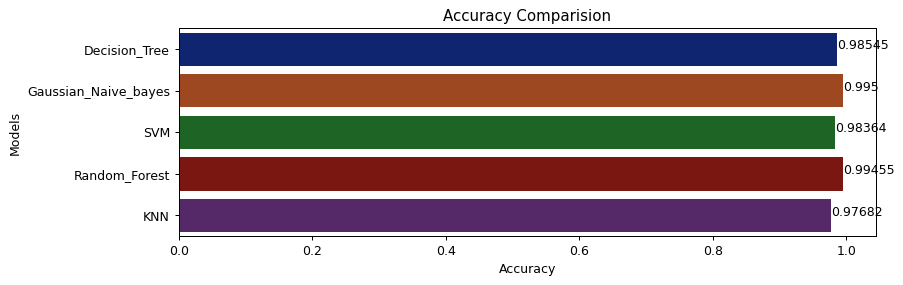

In [63]:
plt.figure(figsize=[10,3],dpi=90)
plt.title('Accuracy Comparision')
plt.xlabel('Accuracy')
plt.ylabel('Models')
sns.barplot(x=acc,y=model_names,palette='dark')
for i,j in enumerate(acc):
    x=round(j,5)
    plt.text(j,i,str(x))


In [64]:
accuracy_model=dict(zip(model_names,acc))
for i,j in accuracy_model.items():
    print(i.ljust(23,'-')+'>',j)

Decision_Tree----------> 0.9854545454545454
Gaussian_Naive_bayes---> 0.9950000000000001
SVM--------------------> 0.9836363636363636
Random_Forest----------> 0.9945454545454545
KNN--------------------> 0.9768181818181819


# New Data Prediction

In [65]:
data=np.array(crop_df.sample())
print(data)
data=np.array([data[0][:7]])
data

[[13 23 6 23.96147583 90.26408017 7.365338111 102.6958703 'orange']]


array([[13, 23, 6, 23.96147583, 90.26408017, 7.365338111, 102.6958703]],
      dtype=object)

In [66]:
for i in range(100):
    data=np.array(crop_df.sample())
    print(data)
    data=np.array([data[0][:7]])
    for i in range(len(models)):
        print(model_names[i].ljust(23,'-')+'>',models[i].predict(scalar.transform(data)))
    print('-------------------------------------------')

[[12 29 40 19.68291173 89.75272999 6.594037135 111.2818551 'pomegranate']]
Decision_Tree----------> ['pomegranate']
Gaussian_Naive_bayes---> ['pomegranate']
SVM--------------------> ['pomegranate']
Random_Forest----------> ['pomegranate']
KNN--------------------> ['pomegranate']
-------------------------------------------
[[0 69 21 25.86928193 61.88321072 7.072923306 36.68284038 'lentil']]
Decision_Tree----------> ['lentil']
Gaussian_Naive_bayes---> ['lentil']
SVM--------------------> ['lentil']
Random_Forest----------> ['lentil']
KNN--------------------> ['lentil']
-------------------------------------------
[[34 11 10 31.75048899 94.59551226 7.36220835 115.1989301 'orange']]
Decision_Tree----------> ['orange']
Gaussian_Naive_bayes---> ['orange']
SVM--------------------> ['orange']
Random_Forest----------> ['orange']
KNN--------------------> ['orange']
-------------------------------------------
[[12 142 203 31.3115978 82.56407013 5.972850837999999 65.01095312
  'grapes']]
Decision_Tr

SVM--------------------> ['jute']
Random_Forest----------> ['jute']
KNN--------------------> ['jute']
-------------------------------------------
[[44 75 22 30.0328403 64.14800537 7.574561547 71.21006868 'blackgram']]
Decision_Tree----------> ['blackgram']
Gaussian_Naive_bayes---> ['blackgram']
SVM--------------------> ['blackgram']
Random_Forest----------> ['blackgram']
KNN--------------------> ['blackgram']
-------------------------------------------
[[106 21 35 25.627355 57.04151119 7.4285236339999985 188.5506536 'coffee']]
Decision_Tree----------> ['coffee']
Gaussian_Naive_bayes---> ['coffee']
SVM--------------------> ['coffee']
Random_Forest----------> ['coffee']
KNN--------------------> ['coffee']
-------------------------------------------
[[36 76 75 18.38120357 16.63805158 8.736337905 70.52056697 'chickpea']]
Decision_Tree----------> ['chickpea']
Gaussian_Naive_bayes---> ['chickpea']
SVM--------------------> ['chickpea']
Random_Forest----------> ['chickpea']
KNN----------------

KNN--------------------> ['muskmelon']
-------------------------------------------
[[5 56 24 24.80710166 45.01110015 5.023115055 188.4928637 'pigeonpeas']]
Decision_Tree----------> ['pigeonpeas']
Gaussian_Naive_bayes---> ['pigeonpeas']
SVM--------------------> ['pigeonpeas']
Random_Forest----------> ['pigeonpeas']
KNN--------------------> ['pigeonpeas']
-------------------------------------------
[[40 51 17 28.66086349 86.12194568 6.860602782000001 50.01534317
  'mungbean']]
Decision_Tree----------> ['mungbean']
Gaussian_Naive_bayes---> ['mungbean']
SVM--------------------> ['mungbean']
Random_Forest----------> ['mungbean']
KNN--------------------> ['mungbean']
-------------------------------------------
[[52 56 85 20.118744600000007 14.44228303 6.81712422 88.68168643
  'chickpea']]
Decision_Tree----------> ['chickpea']
Gaussian_Naive_bayes---> ['chickpea']
SVM--------------------> ['chickpea']
Random_Forest----------> ['chickpea']
KNN--------------------> ['chickpea']
----------------

SVM--------------------> ['mango']
Random_Forest----------> ['mango']
KNN--------------------> ['mango']
-------------------------------------------
[[14 22 9 17.24944623 91.13772765 6.543191814 112.50905159999998 'orange']]
Decision_Tree----------> ['orange']
Gaussian_Naive_bayes---> ['orange']
SVM--------------------> ['orange']
Random_Forest----------> ['orange']
KNN--------------------> ['orange']
-------------------------------------------
[[31 121 201 23.15791104 90.34396882 5.731535257999999 110.712841 'apple']]
Decision_Tree----------> ['apple']
Gaussian_Naive_bayes---> ['apple']
SVM--------------------> ['apple']
Random_Forest----------> ['apple']
KNN--------------------> ['apple']
-------------------------------------------
[[90 39 37 24.81441246 81.68688879 6.86106911 190.7886386 'jute']]
Decision_Tree----------> ['rice']
Gaussian_Naive_bayes---> ['jute']
SVM--------------------> ['jute']
Random_Forest----------> ['jute']
KNN--------------------> ['jute']
-------------------

In [67]:
crop_list=crop_df['label']
pickle.dump(crop_list,open('crop_list.pkl','wb'))